# PowerCo Data Analysis
We first import libraries and read the csv files.

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from scipy.stats import norm

In [3]:
df_client = pd.read_csv('client_data.csv')
df_price = pd.read_csv('price_data.csv')

We can visualise several rows of the datasets.

In [4]:
print(df_client.head())

                                 id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t

In [5]:
print(df_price.head())

                                 id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3             

We could also calculate the mean, standard deviation, and quantiles of each variable.

In [6]:
print(df_client.describe())

           cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000

In [7]:
print(df_price.describe())

       price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930     

We need to check if the dataset is complete and contains no null values.

In [8]:
print(df_client.isnull().sum())

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64


In [9]:
print(df_price.isnull().sum())

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64


We then check the type of enties in each column.

In [10]:
print(df_client.dtypes)

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

In [11]:
print(df_price.dtypes)

id                     object
price_date             object
price_off_peak_var    float64
price_peak_var        float64
price_mid_peak_var    float64
price_off_peak_fix    float64
price_peak_fix        float64
price_mid_peak_fix    float64
dtype: object


We can visualise the variables by plotting the histgrams of variables to see if they are distributed normally. Unfortunately, they are not normally distributed and some of them are highly skewed to the right.

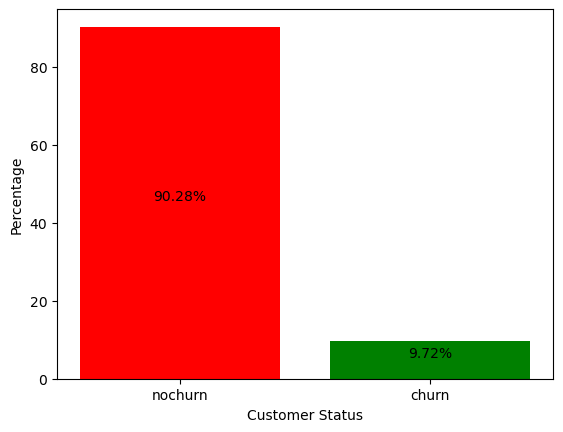

In [42]:
perc_0 = (df_client['churn'] == 0).mean() * 100
perc_1 = (df_client['churn'] == 1).mean() * 100

plt.bar(['nochurn', 'churn'], [perc_0, perc_1], color = ['r', 'g'])
plt.xlabel('Customer Status')
plt.ylabel('Percentage')

for i, perc in enumerate([perc_0, perc_1]):
    plt.text(i, perc/2, f'{perc:.2f}%', ha='center', va='bottom')
    
#plt.show()
plt.savefig('Churn Rate.png')

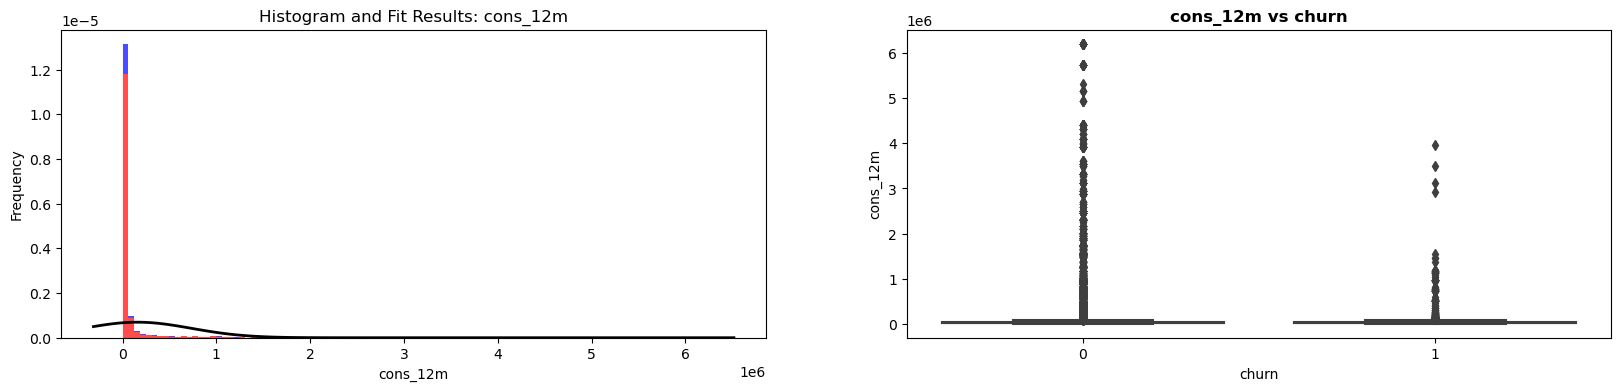

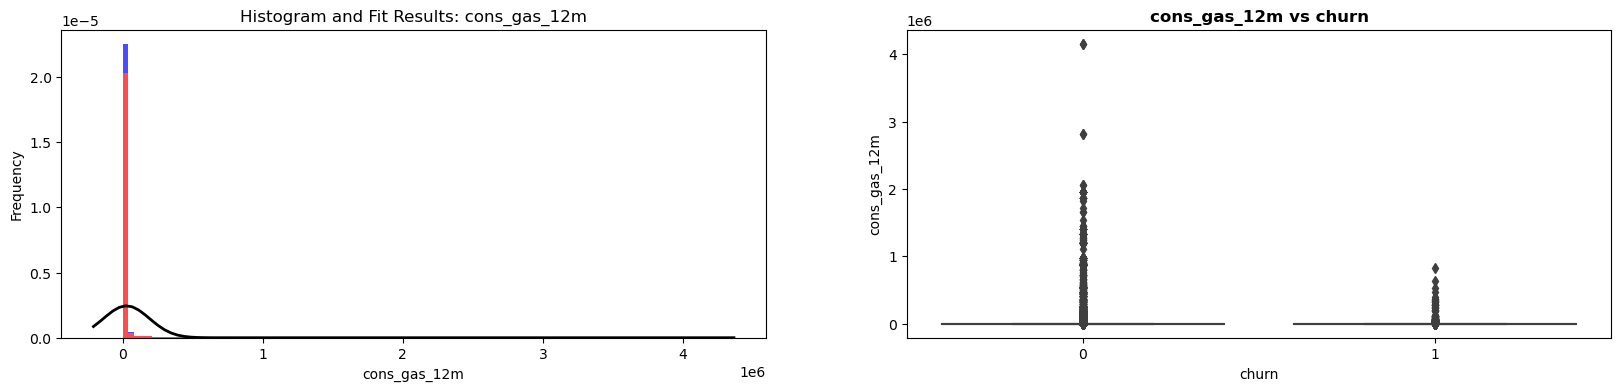

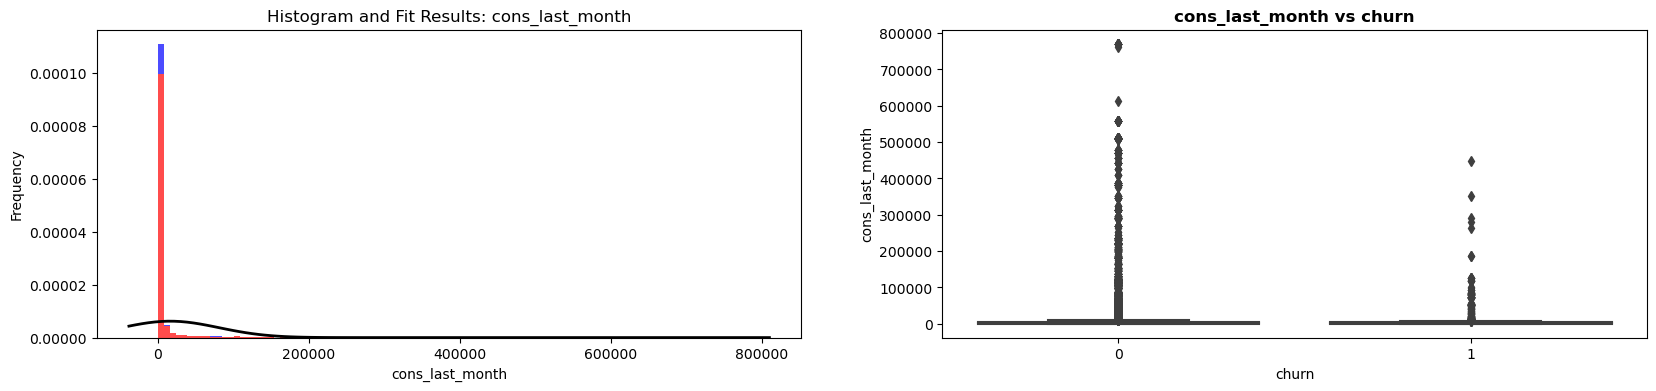

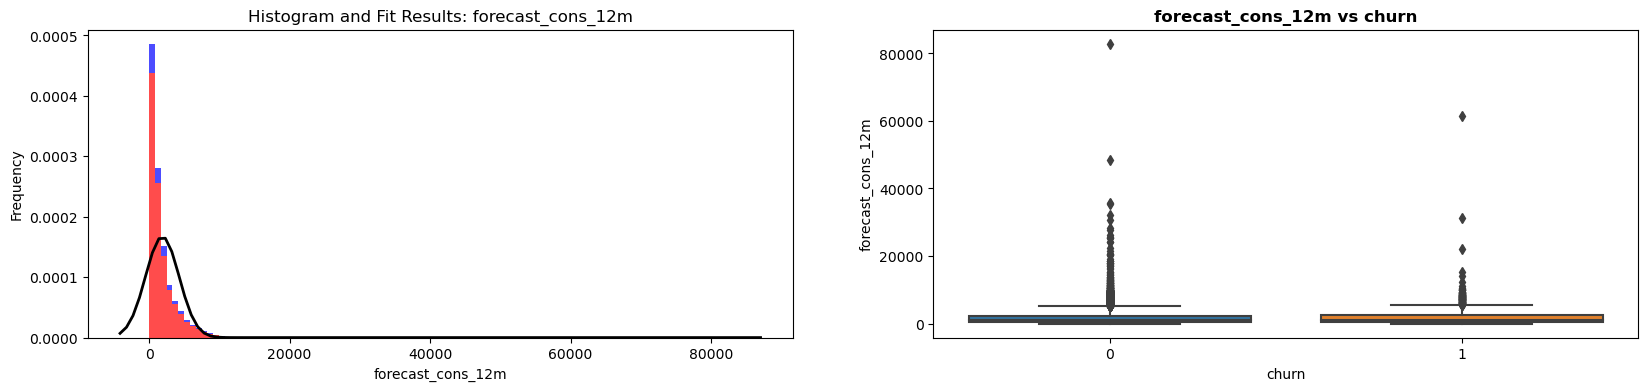

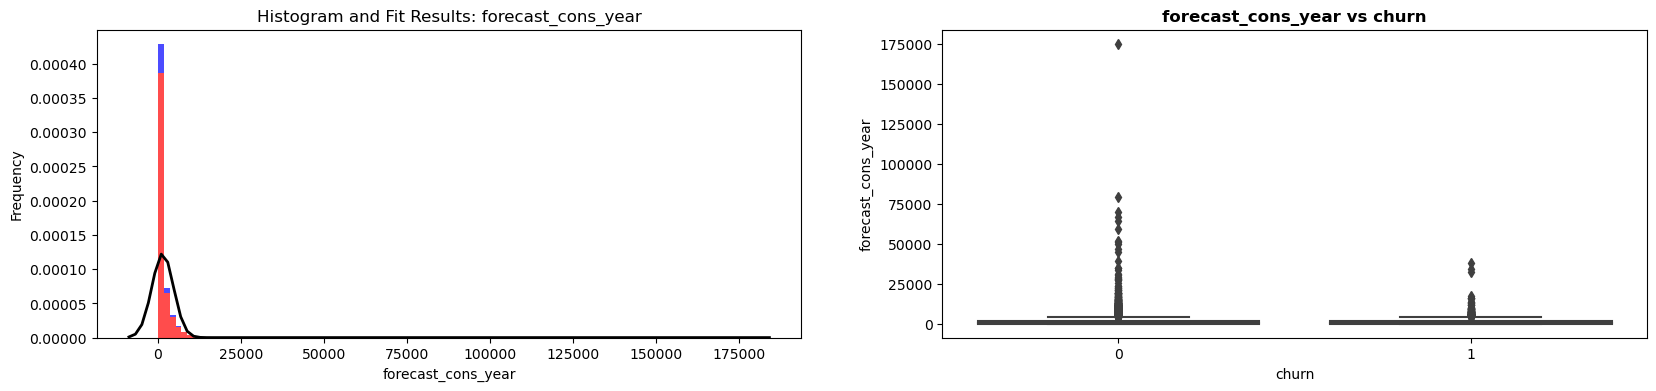

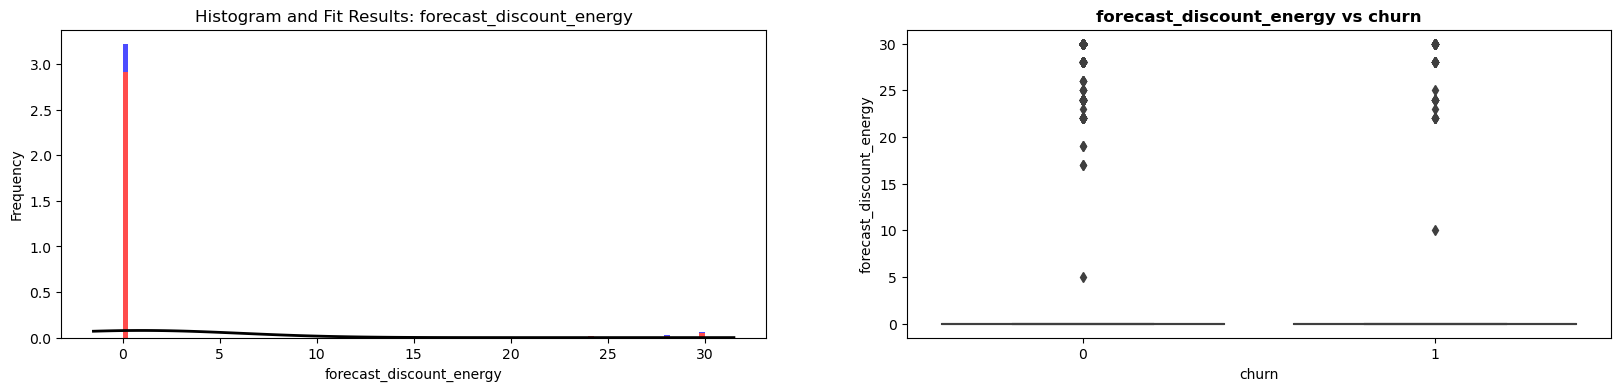

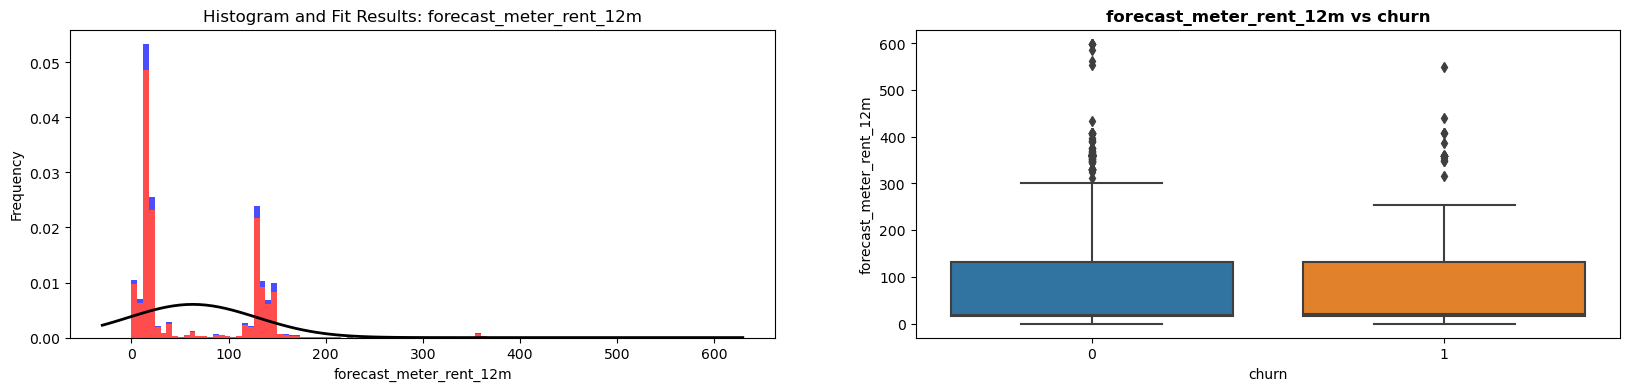

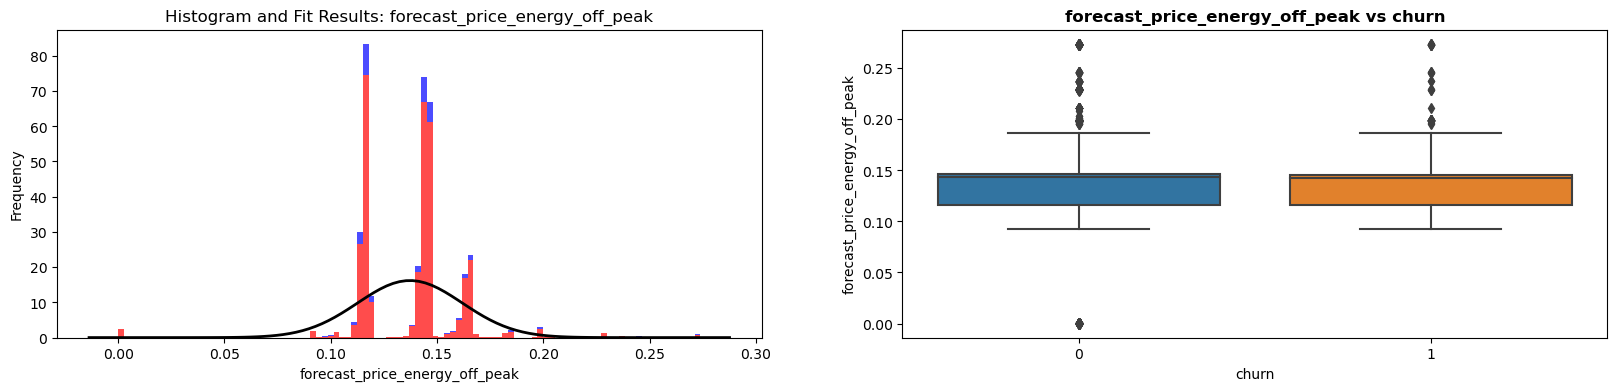

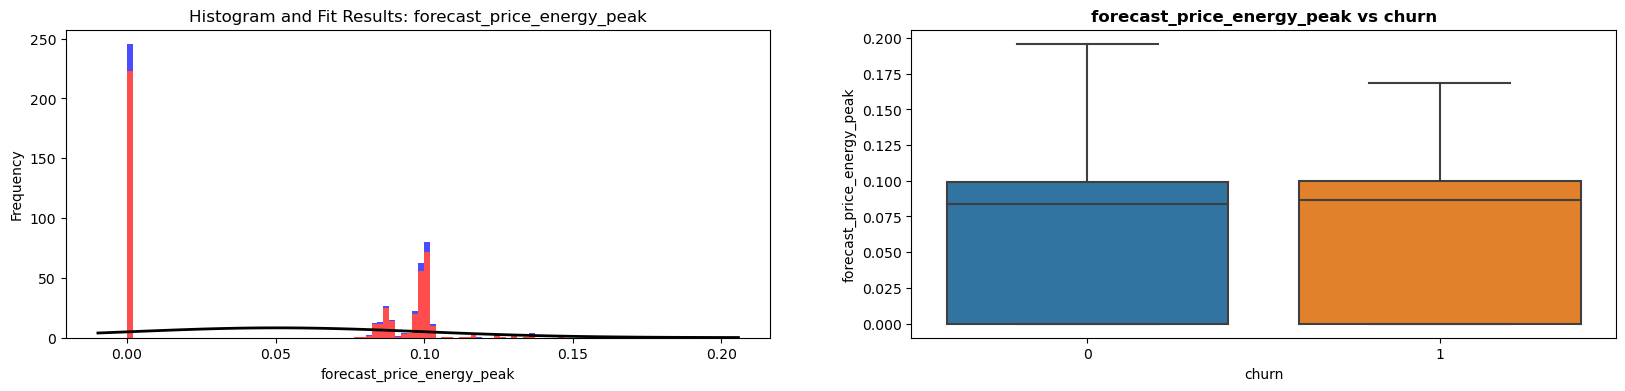

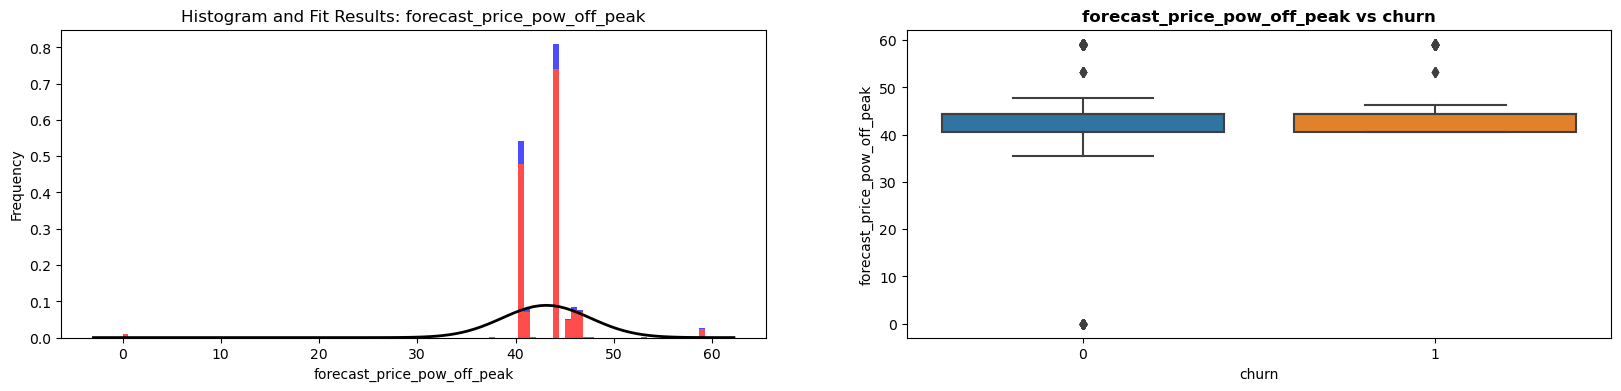

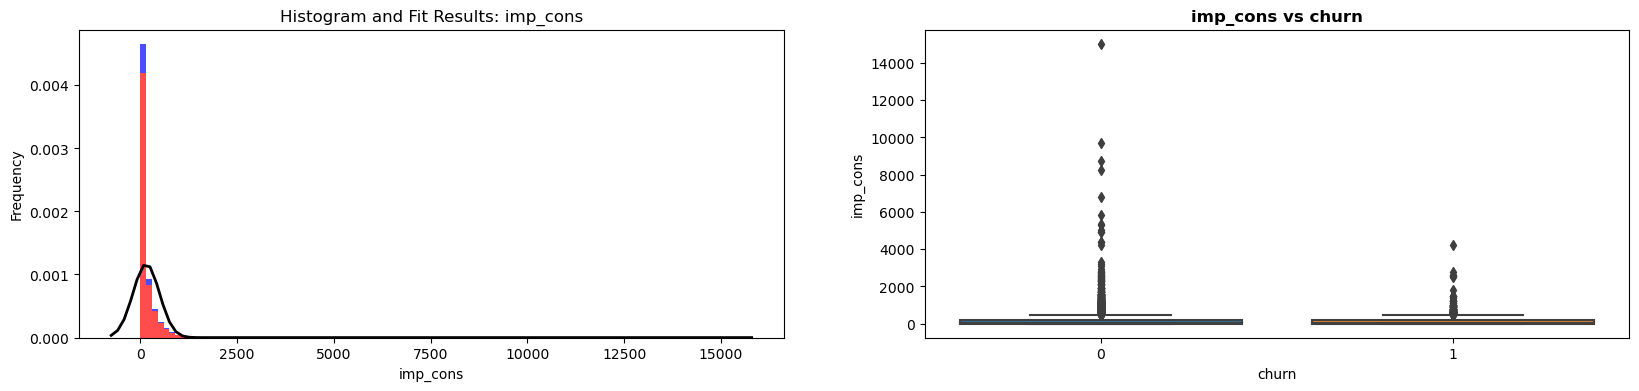

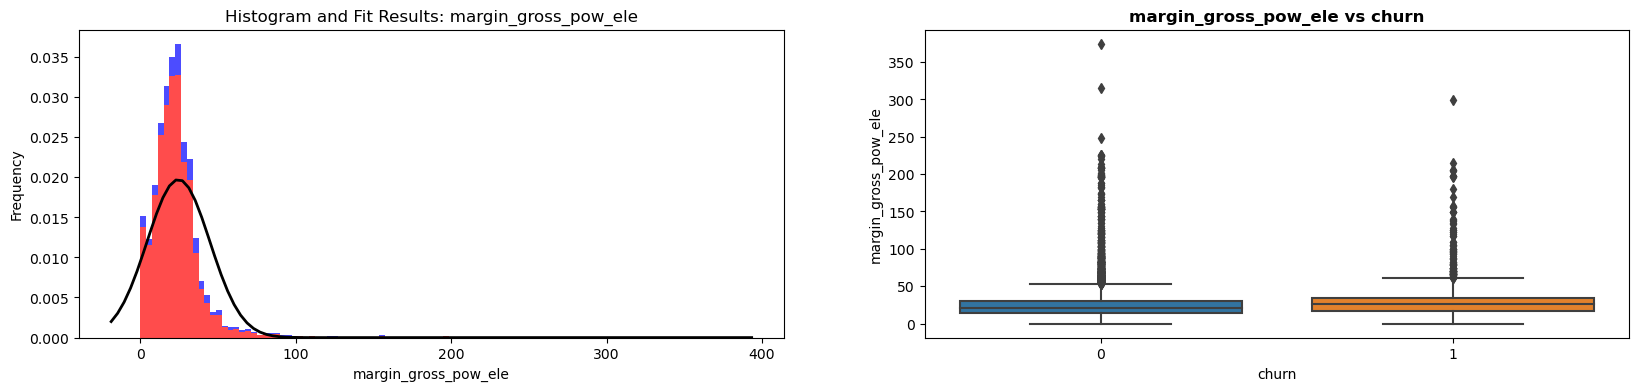

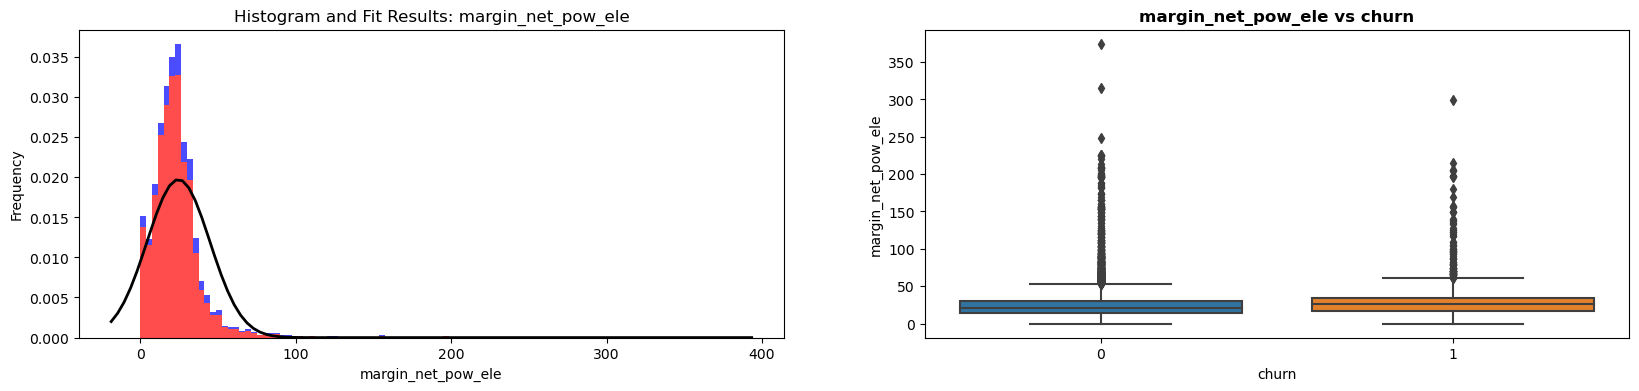

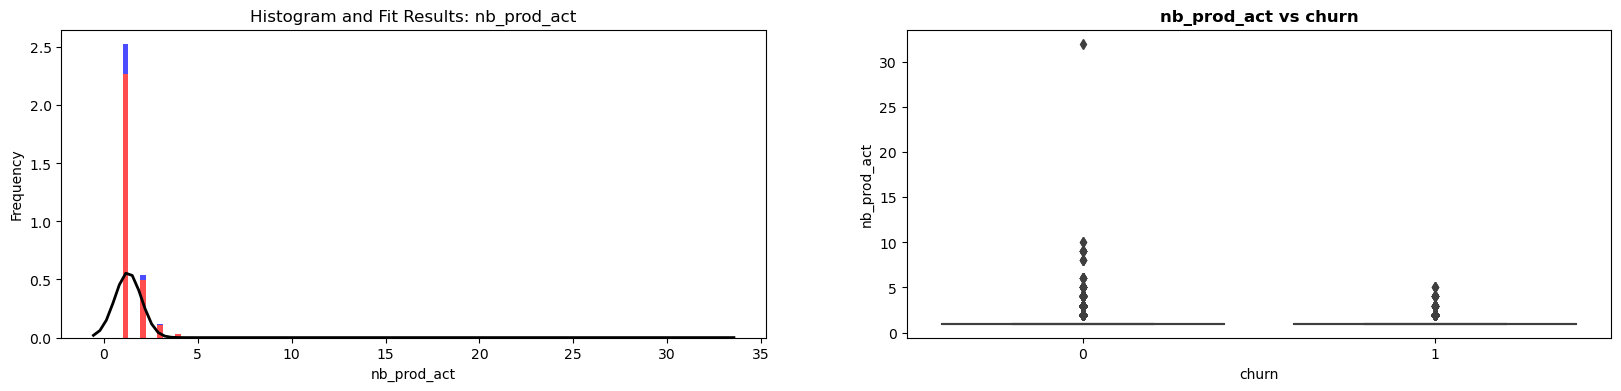

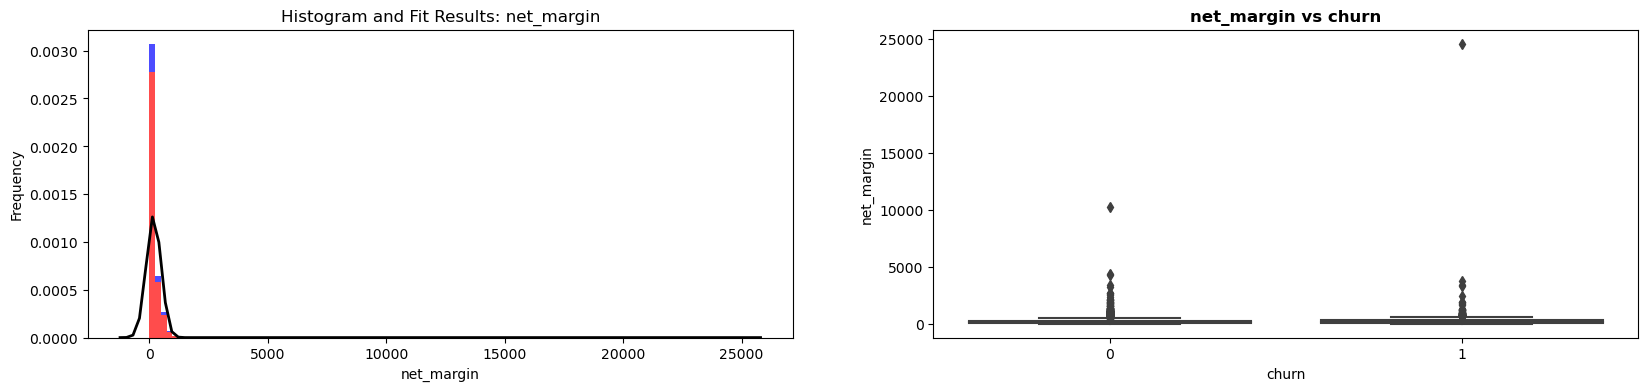

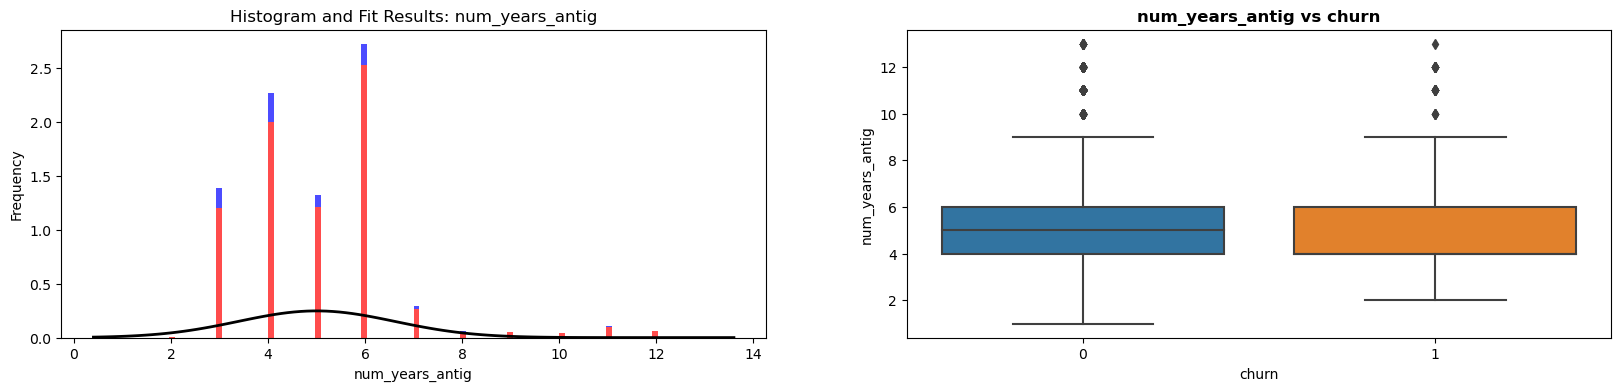

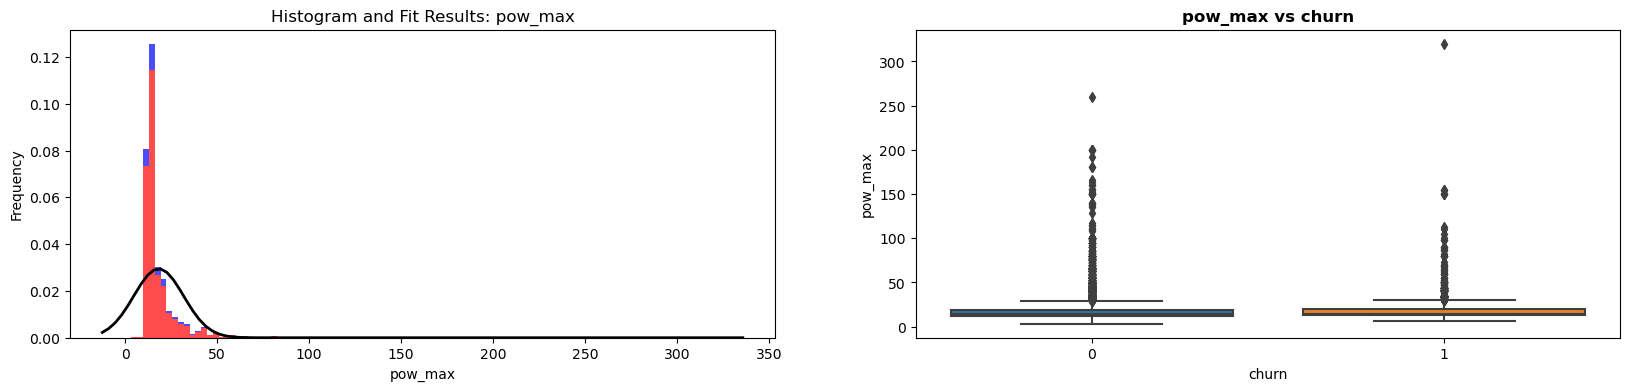

In [12]:
number_columns_client = df_client.select_dtypes(include = ['float64', 'int64'])

for i in number_columns_client.columns[:-1]:
    f, axes = plt.subplots(ncols = 2, figsize=(20, 4))
    data_plot_nochurn = df_client[df_client['churn'] == 0][i]
    data_plot_churn = df_client[df_client['churn'] == 1][i]
    axes[0].hist([data_plot_nochurn, data_plot_churn], bins=100, color=['r', 'b'], label = ['nochurn', 'churn'], density=True, alpha = 0.7, stacked = True)
    
    try:
        mean, std = stats.norm.fit(number_columns_client[i])
        x_min, x_max = axes[0].get_xlim()
        xxx = np.linspace(x_min, x_max, 100)
        pdf = stats.norm.pdf(xxx, mean, std)
        axes[0].plot(xxx, pdf, 'k', linewidth=2)
    except:
        continue
    axes[0].set_title(f'Histogram and Fit Results: {i}')
    axes[0].set_xlabel(i)
    axes[0].set_ylabel('Frequency')

    sns.boxplot(x = 'churn', y = i, data = df_client, whis = 1.5, ax = axes[1])
    axes[1].set_title(i+ ' vs churn', fontweight = 'bold')
    plt.show()
    

We can count the zeros in each variable and we find that there are 90.28% instances in our dataset are nochurn instances. This indicates that we have a highly imbalanced dataset.

In [13]:
count = len(df_client['churn'])
print(df_client[df_client == 0].count(axis = 0)/count)

id                                0.000000
channel_sales                     0.000000
cons_12m                          0.008010
cons_gas_12m                      0.821169
cons_last_month                   0.341161
date_activ                        0.000000
date_end                          0.000000
date_modif_prod                   0.000000
date_renewal                      0.000000
forecast_cons_12m                 0.020950
forecast_cons_year                0.420923
forecast_discount_energy          0.964946
forecast_meter_rent_12m           0.049637
forecast_price_energy_off_peak    0.001506
forecast_price_energy_peak        0.480693
forecast_price_pow_off_peak       0.006436
has_gas                           0.000000
imp_cons                          0.422361
margin_gross_pow_ele              0.010749
margin_net_pow_ele                0.010749
nb_prod_act                       0.000000
net_margin                        0.012666
num_years_antig                   0.000000
origin_up  

We can check the past price, the forecast price, the past consumpption, and the forecast consumption for a certain client.

In [14]:
print(df_client.loc[df_client['id'] == '038af19179925da21a25619c5a24b745']['forecast_price_energy_off_peak'])

11047    0.14398
Name: forecast_price_energy_off_peak, dtype: float64


In [15]:
print(df_price.loc[df_price['id'] == '038af19179925da21a25619c5a24b745'])

                                  id  price_date  price_off_peak_var  \
0   038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1   038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2   038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3   038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4   038af19179925da21a25619c5a24b745  2015-05-01            0.149626   
5   038af19179925da21a25619c5a24b745  2015-06-01            0.149626   
6   038af19179925da21a25619c5a24b745  2015-07-01            0.150321   
7   038af19179925da21a25619c5a24b745  2015-08-01            0.145859   
8   038af19179925da21a25619c5a24b745  2015-09-01            0.145859   
9   038af19179925da21a25619c5a24b745  2015-10-01            0.145859   
10  038af19179925da21a25619c5a24b745  2015-11-01            0.145859   
11  038af19179925da21a25619c5a24b745  2015-12-01            0.145859   

    price_peak_var  price_mid_peak_var  price_off_peak_fix  pri

In [16]:
print(df_client.loc[df_client['id'] == '038af19179925da21a25619c5a24b745']['cons_12m'])
print(df_client.loc[df_client['id'] == '038af19179925da21a25619c5a24b745']['forecast_cons_12m'])
print(df_client.loc[df_client['id'] == '038af19179925da21a25619c5a24b745']['forecast_cons_year'])

11047    3576
Name: cons_12m, dtype: int64
11047    531.5
Name: forecast_cons_12m, dtype: float64
11047    630
Name: forecast_cons_year, dtype: int64


/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_1059/2168206144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  certain_client['price_date'] = pd.to_datetime(certain_client['price_date'])


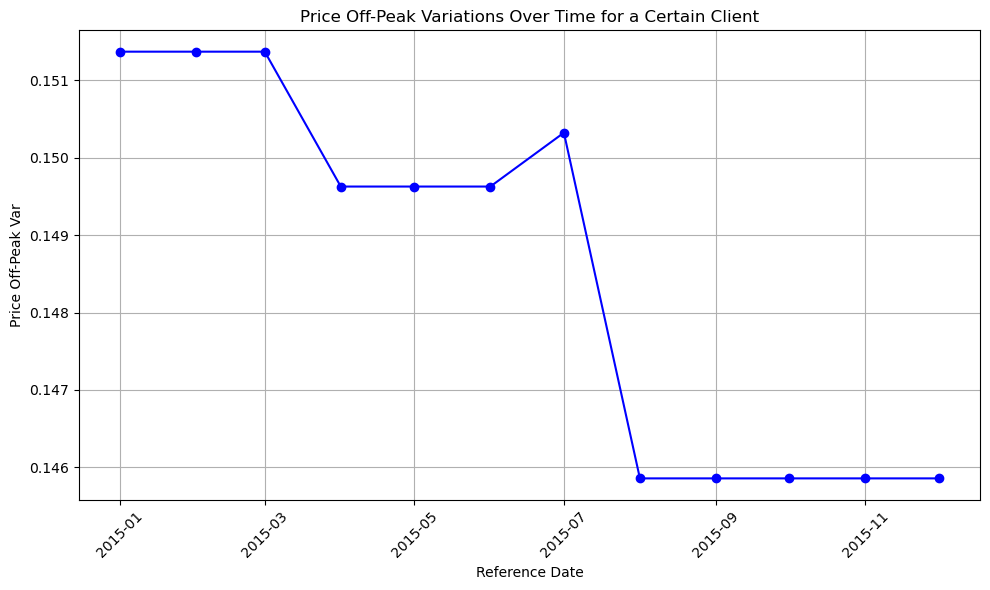

In [17]:
certain_client = df_price.loc[df_price['id'] == '038af19179925da21a25619c5a24b745']
certain_client['price_date'] = pd.to_datetime(certain_client['price_date'])


plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(certain_client['price_date'], certain_client['price_off_peak_var'], marker='o', linestyle='-', color='b')
plt.title('Price Off-Peak Variations Over Time for a Certain Client')
plt.xlabel('Reference Date')
plt.ylabel('Price Off-Peak Var')
plt.xticks(rotation=45) 
plt.grid(True)


plt.tight_layout()
plt.show()


It is convinient to work in a single dataset. Therefore, we combine the two datasets. It is assumed that the past price is the mean value of the price paid in the past months for a certain customer. 

In [18]:
past_elec_price_mean_1 = []
past_power_price_mean_1 = []
past_elec_price_mean_2 = []
past_power_price_mean_2 = []
past_elec_price_mean_3 = []
past_power_price_mean_3 = []
num = 0
for i in df_client['id']:
    certain_client_data = df_price.loc[df_price['id'] == i]
    past_elec_price_mean_1.append(certain_client_data['price_off_peak_var'].mean())
    past_power_price_mean_1.append(certain_client_data['price_off_peak_fix'].mean())
    past_elec_price_mean_2.append(certain_client_data['price_peak_var'].mean())
    past_power_price_mean_2.append(certain_client_data['price_peak_fix'].mean())
    past_elec_price_mean_3.append(certain_client_data['price_mid_peak_var'].mean())
    past_power_price_mean_3.append(certain_client_data['price_mid_peak_fix'].mean())
    num +=1
    if num % 1000 == 0:
        print(num)
    
df_client['past_elec_price_mean_1'] = past_elec_price_mean_1
df_client['past_power_price_mean_1'] = past_power_price_mean_1
df_client['past_elec_price_mean_2'] = past_elec_price_mean_2
df_client['past_power_price_mean_2'] = past_power_price_mean_2
df_client['past_elec_price_mean_3'] = past_elec_price_mean_3
df_client['past_power_price_mean_3'] = past_power_price_mean_3

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000


In [19]:
print(df_client.loc[df_client['id'] == '038af19179925da21a25619c5a24b745'])

                                     id                     channel_sales  \
11047  038af19179925da21a25619c5a24b745  foosdfpfkusacimwkcsosbicdxkicaua   

       cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
11047      3576             0              630  2013-06-03  2016-06-03   

      date_modif_prod date_renewal  forecast_cons_12m  ...  num_years_antig  \
11047      2015-04-29   2015-06-14              531.5  ...                3   

                              origin_up  pow_max  churn  \
11047  ldkssxwpmemidmecebumciepifcamkci     13.2      0   

       past_elec_price_mean_1  past_power_price_mean_1 past_elec_price_mean_2  \
11047                 0.14855                 44.35582                    0.0   

       past_power_price_mean_2  past_elec_price_mean_3  \
11047                      0.0                     0.0   

       past_power_price_mean_3  
11047                      0.0  

[1 rows x 32 columns]


Now we define price sensitivity. Intuitively, price sensitivity is a quantitative measure of how a certain customer behave when price changes. Since we do not have data for past gas consumption. We will focus on the electricity consumption. We therefore define the following:
$$price\,sensitivity = -\frac{percentage\,change\,in\,electric\,consumption}{percentage\,change\,in\,energy\,price}$$
where
$$percentage\,change\,in\,electric\,consumption = \frac{forecast\,consumption\,for\,next\,12\,months - electric\,consumption\,in\,the\,last\,12\,months}{electric\,consumption\,in\,the\,last\,12\,months}$$
and
$$percentage\,change\,in\,energy\,price = \frac{energy\,forecast\,price \cdot discount - energy\,past\,price}{energy\,past\,price}$$

In this definition, the customer with high price sensitivity will reduce the electricity consumption significantly when price slightly changes and vise vesa.

In [20]:
length = len(df_client['id'])
price_sensitivity = []
for i in range(length):
    elec_price_perc_change_1 = (df_client.iloc[i]['forecast_price_energy_off_peak']*(1-df_client.iloc[i]['forecast_discount_energy'])
                                -df_client.iloc[i]['past_elec_price_mean_1'])/df_client.iloc[i]['past_elec_price_mean_1']
    elec_cons_perc_change_1 = (df_client.iloc[i]['forecast_cons_12m']-df_client.iloc[i]['cons_12m'])/df_client.iloc[i]['cons_12m']
    price_sensitivity.append(-elec_cons_perc_change_1/elec_price_perc_change_1)

df_client['price_sensitivity'] = price_sensitivity

print(df_client['price_sensitivity'].head())

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_1059/937458702.py:6: RuntimeWarning: invalid value encountered in scalar divide
  elec_cons_perc_change_1 = (df_client.iloc[i]['forecast_cons_12m']-df_client.iloc[i]['cons_12m'])/df_client.iloc[i]['cons_12m']
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_1059/937458702.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  price_sensitivity.append(-elec_cons_perc_change_1/elec_price_perc_change_1)
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_1059/937458702.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  elec_cons_perc_change_1 = (df_client.iloc[i]['forecast_cons_12m']-df_client.iloc[i]['cons_12m'])/df_client.iloc[i]['cons_12m']
/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_1059/937458702.py:4: RuntimeWarning: invalid value encountered in scalar divide
  elec_price_perc_change_1 = (df_client.iloc[i]['forecast_price_energy_off_peak']*(1-df_client.iloc[i]['fo

0          NaN
1   -36.817254
2   -32.956770
3   -28.408609
4   -15.350644
Name: price_sensitivity, dtype: float64


We need to clean the dataset by removing the undefined value (NaN) and deleting the extreme outliers.

In [21]:
print(df_client.head())

                                 id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015

In [22]:
df_client.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean = df_client.dropna()
df_clean.loc[df_clean['price_sensitivity'] < -100, 'price_sensitivity'] = -100
df_clean.loc[df_clean['price_sensitivity'] > 100, 'price_sensitivity'] = 100

The following is the histgram of price sensitivity. We see most of them are negative.

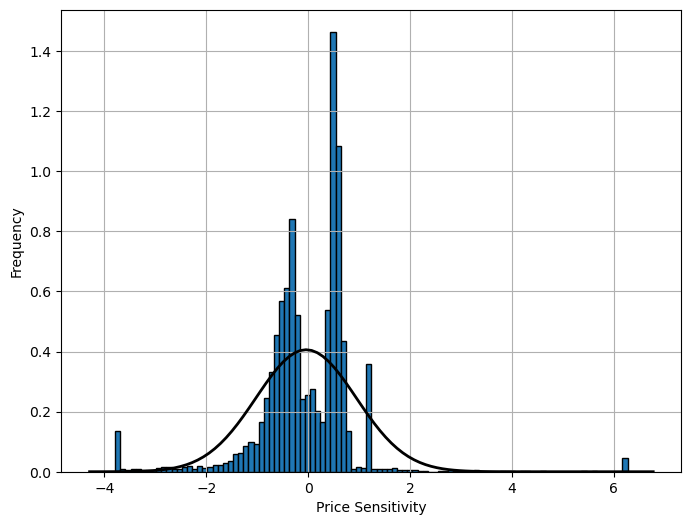

In [43]:
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(df_clean['price_sensitivity'], bins=100, edgecolor='k', density=True)
mean, std = stats.norm.fit(df_clean['price_sensitivity'])
x_min, x_max = plt.xlim()
xxx = np.linspace(x_min, x_max, 100)
pdf = stats.norm.pdf(xxx, mean, std)
plt.plot(xxx, pdf, 'k', linewidth=2)
plt.xlabel('Price Sensitivity')
plt.ylabel('Frequency')
    
plt.grid(True)
#plt.show()
plt.savefig('Price Sensitivity.png')

The correlation between price sensitivity and churn rate is very low. But this may be caused by the imbalance of out dataset.

In [24]:
correlation = df_clean['price_sensitivity'].corr(df_clean['churn'])
print(correlation)

0.04324140755459338


We then scale the price sensitivity and undersample the whole dataset.

In [25]:
from sklearn.preprocessing import RobustScaler
df_clean[['price_sensitivity']] = RobustScaler().fit_transform(df_clean[['price_sensitivity']])

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_1059/3050740669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['price_sensitivity']] = RobustScaler().fit_transform(df_clean[['price_sensitivity']])


In [26]:
df_churn = df_clean.loc[df_clean['churn'] == 1]
df_nochurn = df_clean.loc[df_clean['churn'] == 0]
churn_number = (df_clean['churn'] == 1).sum()
print(churn_number)
df_nochurn_shuffle = df_nochurn.sample(frac=1, random_state = 77)[:churn_number]
df_balanced = pd.concat([df_churn, df_nochurn_shuffle], axis = 0).sample(frac = 1)
print(df_balanced.head())
print((df_balanced['churn'] == 1).sum()/len(df_balanced))

1409
                                     id                     channel_sales  \
12845  eed91f6ef78c9e79a6dbc6d2daeaa5dd  usilxuppasemubllopkaafesmlibmsdf   
4463   3fbab5262fc2a28bfa258bccf2ef473a  foosdfpfkusacimwkcsosbicdxkicaua   
3718   469ca13c96b25c1a4dc60d71fb2256fc  lmkebamcaaclubfxadlmueccxoimlema   
14386  1bcfbbb7b77f72d66ef122504cd61c9a  foosdfpfkusacimwkcsosbicdxkicaua   
968    62af0589c80dc24cf79a4058cbbac1d8  lmkebamcaaclubfxadlmueccxoimlema   

       cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
12845      2860             0              527  2011-06-27  2016-06-27   
4463      16222             0                0  2012-02-01  2016-02-01   
3718    6207104         41532           558120  2011-03-02  2016-08-01   
14386      6376             0             1093  2009-08-05  2016-08-05   
968        5010             0              545  2010-06-09  2016-06-09   

      date_modif_prod date_renewal  forecast_cons_12m  ...  \
12845      2011-06-27   2

However, we noticed that the correlation is still low.

In [27]:
balanced_corr = df_balanced['price_sensitivity'].corr(df_balanced['churn'])
print(balanced_corr)

0.08201952424647517


In [28]:
balanced_corr_matrix = df_balanced.corr()
print(balanced_corr_matrix)

                                cons_12m  cons_gas_12m  cons_last_month  \
cons_12m                        1.000000      0.320729         0.961950   
cons_gas_12m                    0.320729      1.000000         0.339717   
cons_last_month                 0.961950      0.339717         1.000000   
forecast_cons_12m               0.134966      0.057056         0.111827   
forecast_cons_year              0.125982      0.057176         0.135769   
forecast_discount_energy       -0.033180      0.009465        -0.033398   
forecast_meter_rent_12m         0.035042      0.033042         0.035197   
forecast_price_energy_off_peak  0.007887     -0.019163         0.004625   
forecast_price_energy_peak      0.110020      0.067143         0.100817   
forecast_price_pow_off_peak    -0.027667     -0.036647        -0.018378   
imp_cons                        0.123761      0.056655         0.134830   
margin_gross_pow_ele           -0.018970      0.017055        -0.014599   
margin_net_pow_ele       

/var/folders/mp/yc2_4qzn1nbgd2yjg9nxtp140000gn/T/ipykernel_1059/2950260303.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  balanced_corr_matrix = df_balanced.corr()


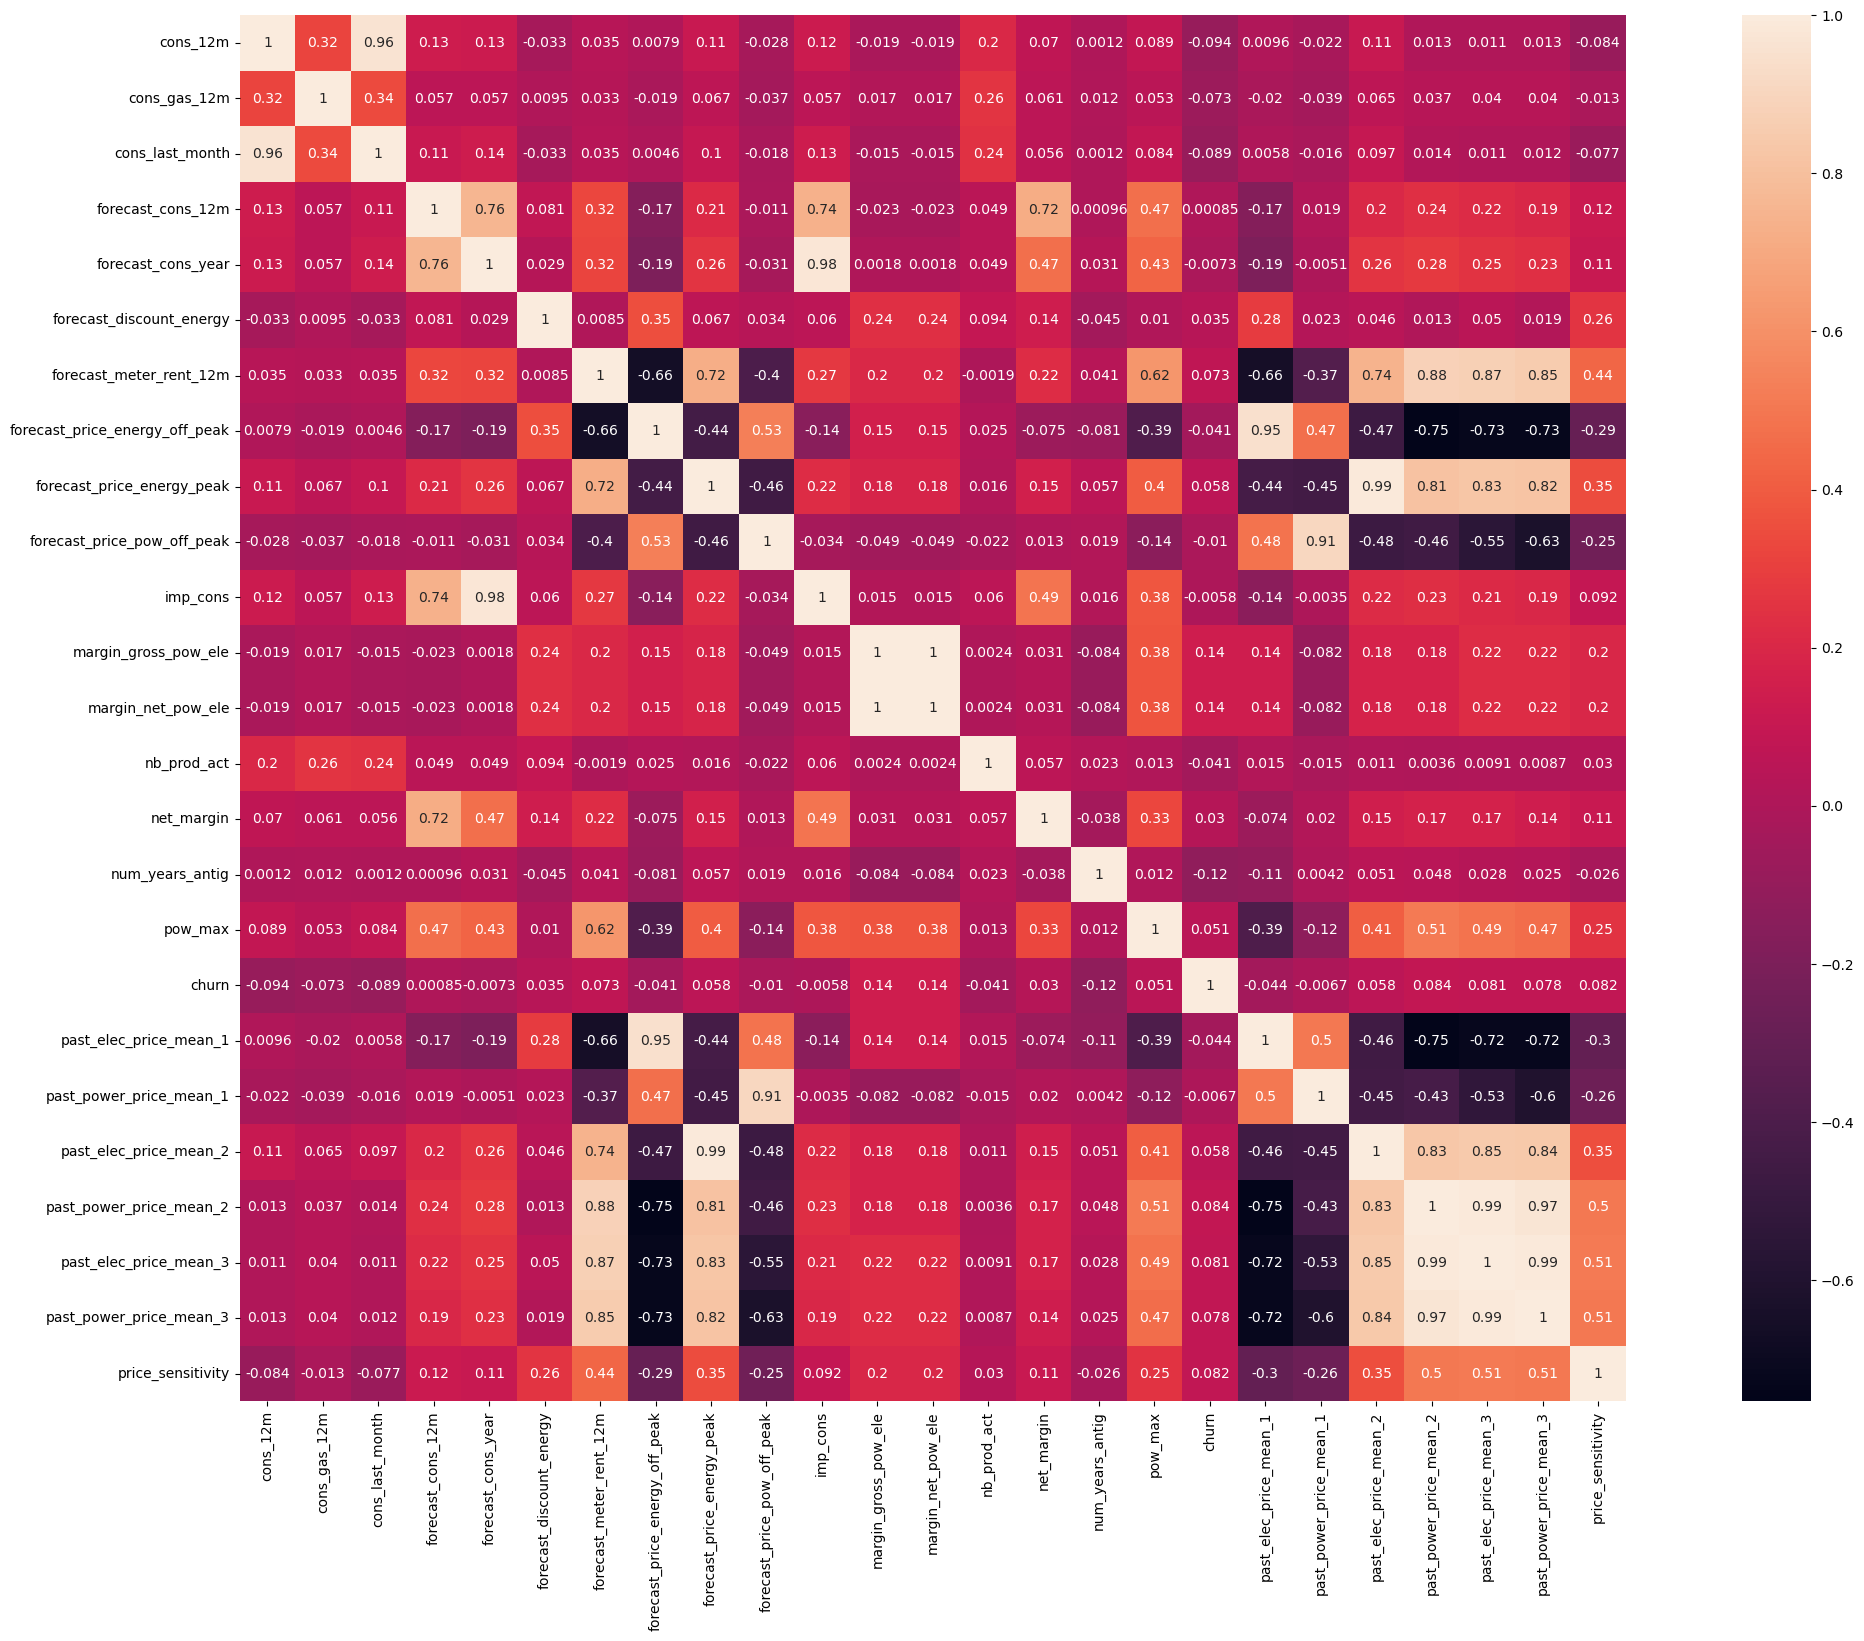

In [32]:
f, ax = plt.subplots(figsize = (30, 18))
sns.heatmap(balanced_corr_matrix, square = True, annot = True)
plt.savefig('Variable Correlation.png')